In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-csv/placement.csv


In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.animation as animation

# when m = constant 

In [3]:
df= pd.read_csv('/kaggle/input/placement-csv/placement.csv')


In [4]:
X=df.drop(columns=['package'])
y=df['package']

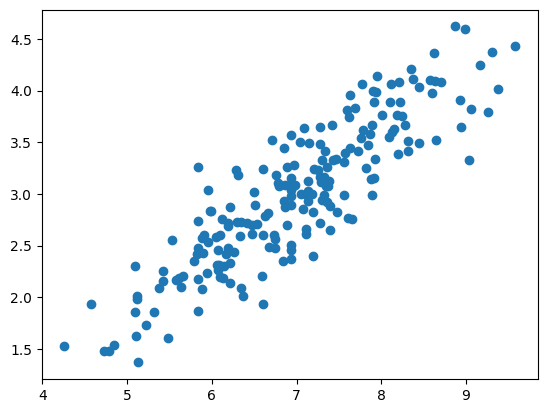

In [5]:
plt.scatter(X,y)
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[0.56959129]
-0.9856779462557332


In [7]:
X.shape[0]

200

In [8]:
X = np.array(X).flatten()
y = np.array(y).flatten()
m = 0.569      # fixed slope
b = -12   # starting intercept
lr = 0.001
epochs = 30

all_b = []
all_lines = []    

for epoch in range(epochs):

    slope_b = 0

    for i in range(len(X)):
        error = y[i] - (m*X[i] + b)
        slope_b += -2 * error

    b = b - lr * slope_b

    all_b.append(b)

    # store predicted line for this epoch
    all_lines.append(m*X + b)


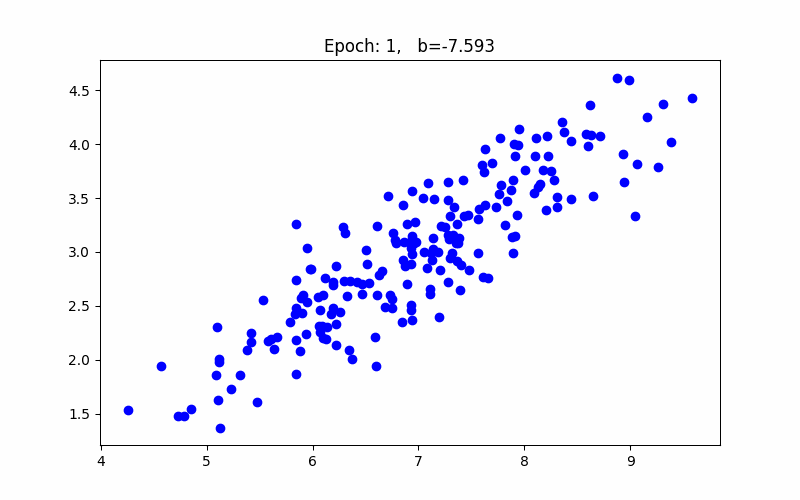

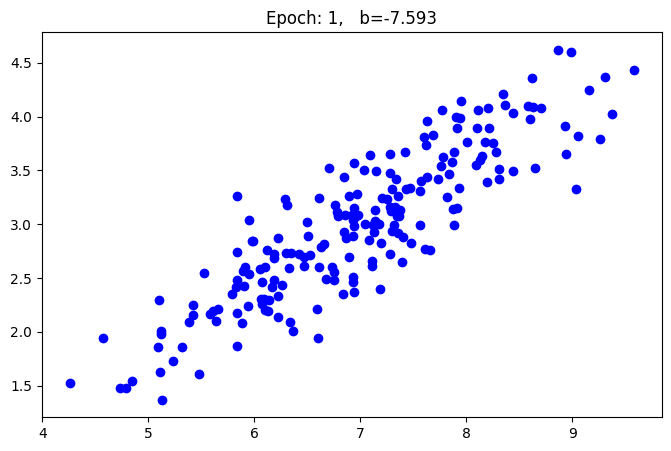

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X, y, color='blue')
X_sorted = np.sort(X, axis=0).ravel()

# For prediction, reorder
y_sorted = m * X_sorted + b

line, = ax.plot(X_sorted, y_sorted, color='red', linewidth=2)

def update(epoch):
    y_pred = all_lines[epoch]
    line.set_data(X, y_pred)
    ax.set_title(f"Epoch: {epoch+1},   b={all_b[epoch]:.3f}")
    return line,

ani = FuncAnimation(fig, update, frames=epochs, interval=500)

writer = PillowWriter(fps=2)
ani.save("gd_animation.gif", writer=writer)
from IPython.display import Image
Image(filename="gd_animation.gif")

# when m and b both are not constant 

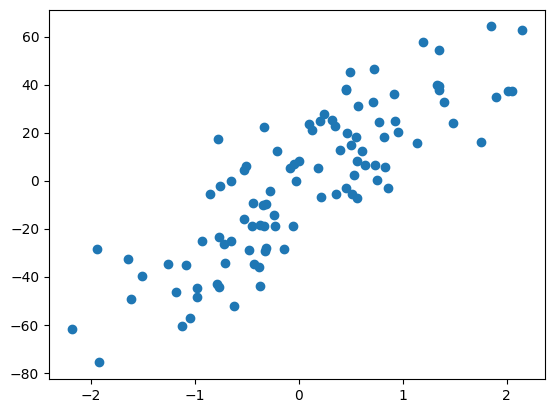

In [10]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [11]:
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

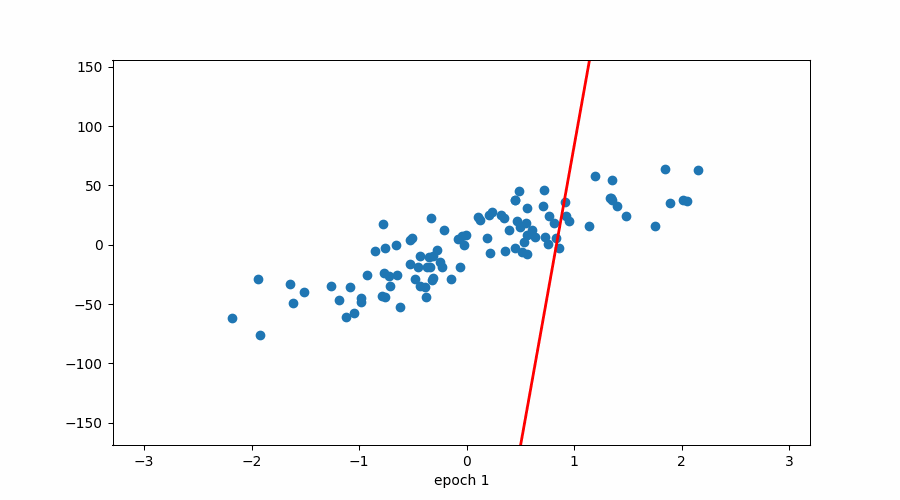

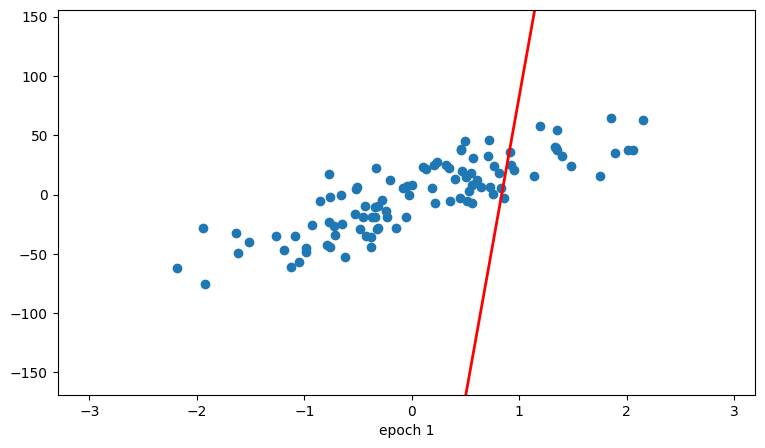

In [12]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

writerr = PillowWriter(fps=2)
anim.save("gdd_animation.gif", writer=writerr)

Image(filename="gdd_animation.gif")

# Stochastic 

In [13]:
import time

b = 150
m = -127.82
all_b = []
all_m = []
all_cost = []
all_lr = []


epochs = 1

start = time.time()

t0,t1 = 5,50
def learning_rate(t):
    return t0/(t + t1)

for i in range(epochs):
    for j in range(X.shape[0]):
        
        lr = learning_rate(i * X.shape[0] + j)
        
        idx = np.random.randint(X.shape[0], size=1)
        
        slope_b = -2 * (y[idx] - (m * X[idx]) -  b)
        slope_m = -2 * (y[idx] - (m * X[idx]) -  b) * X[idx]
        cost = (y[idx] - m * X[idx] -b) ** 2
        
        
        b = b - (lr * slope_b)
        m = m - (lr * slope_m)
        all_b.append(b)
        all_m.append(m)
        all_cost.append(cost)
        all_lr.append(lr)

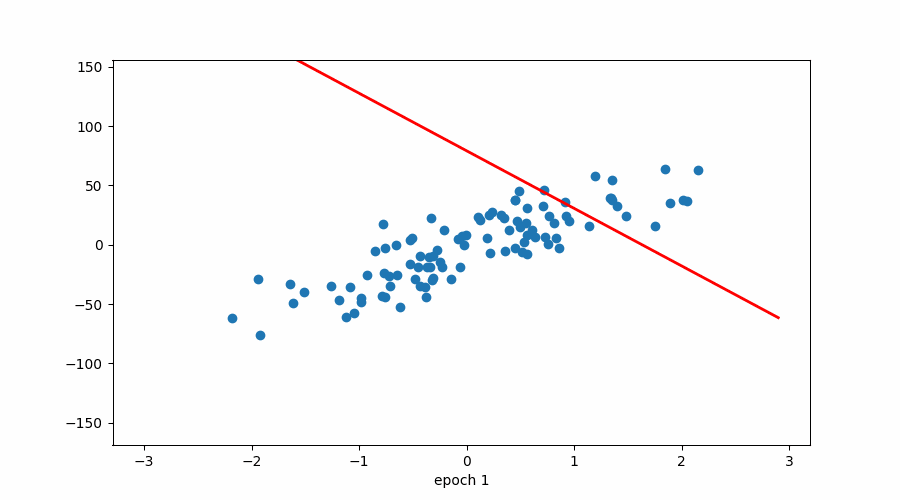

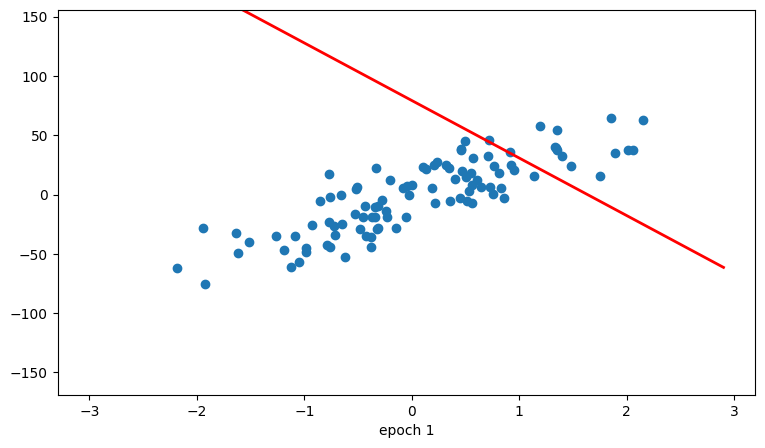

In [14]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, frames=100, interval=5)

f = r"stochastic_animation_line_plot.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)
Image(filename=f)

In [15]:
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)

contour graph of stochastic

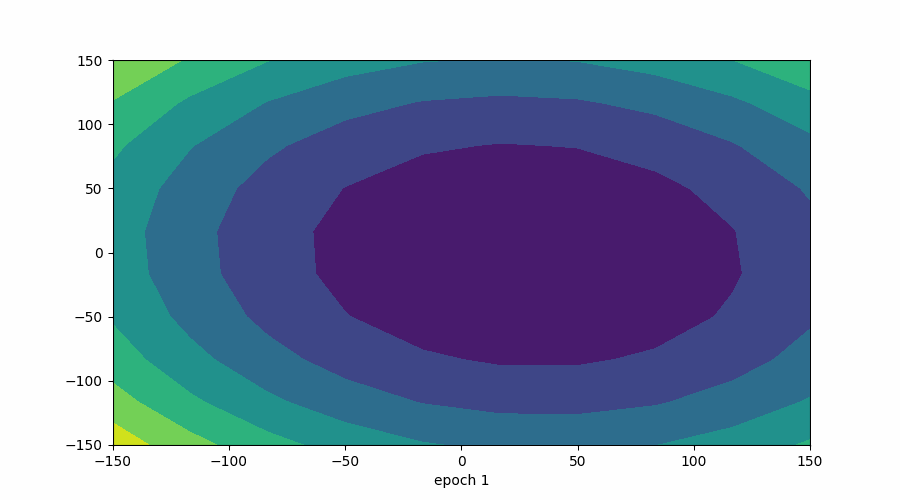

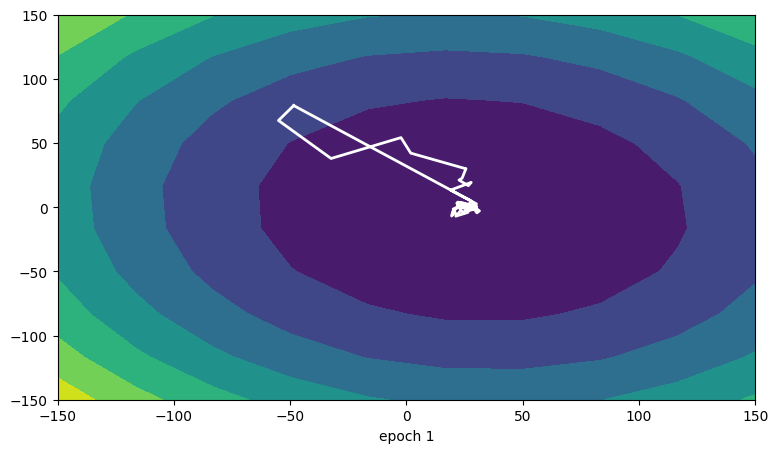

In [16]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(-150, 150), ylim =(-150, 150)) 

axis.contourf(m_arr, b_arr, z_arr)

line, = axis.plot([], [], lw = 2,color='white') 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(all_m[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anime = animation.FuncAnimation(fig, animate, frames = 100,repeat=False, interval = 100)

f = r"stochastic_animation_contour_plot.gif" 
writergif = animation.PillowWriter(fps=2) 
anime.save(f, writer=writergif)
Image(filename = f)

# cost function graph

In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x = m_arr, y = b_arr, z =z_arr)])

fig.update_layout(title='Cost Function', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))



fig.show()